In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk as nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline
tknzer = TweetTokenizer()
stop_words = set(stopwords.words('english'))
stop_words.update(["bout", "em", "cause"])

In [72]:
df = pd.read_csv('discography.csv')

In [73]:
albums = ['thank u, next', 'Yours Truly', 'Dangerous Woman', 'My Everything', 'Sweetener']
df = df.dropna(axis = 0).reset_index(drop = True)
df = df[df.album.isin(albums)]

In [74]:
total_lyrics = []

for song in df['lyrics']:
    new_lyrics = []
    sent_text = []
    lyrics = song.split("\n")
    for i in lyrics:
        if "[" not in i:
            new_lyrics.append(i.replace("\r", "").lower().strip())
    for line in new_lyrics:
        sent_text += tknzer.tokenize(line)
    filtered_text = [w for w in sent_text if not w in stop_words]
    filtered_2_text = [w for w in filtered_text if w.isalpha()]
    total_lyrics.append(filtered_2_text)

In [75]:
df['token_lyrics'] = total_lyrics

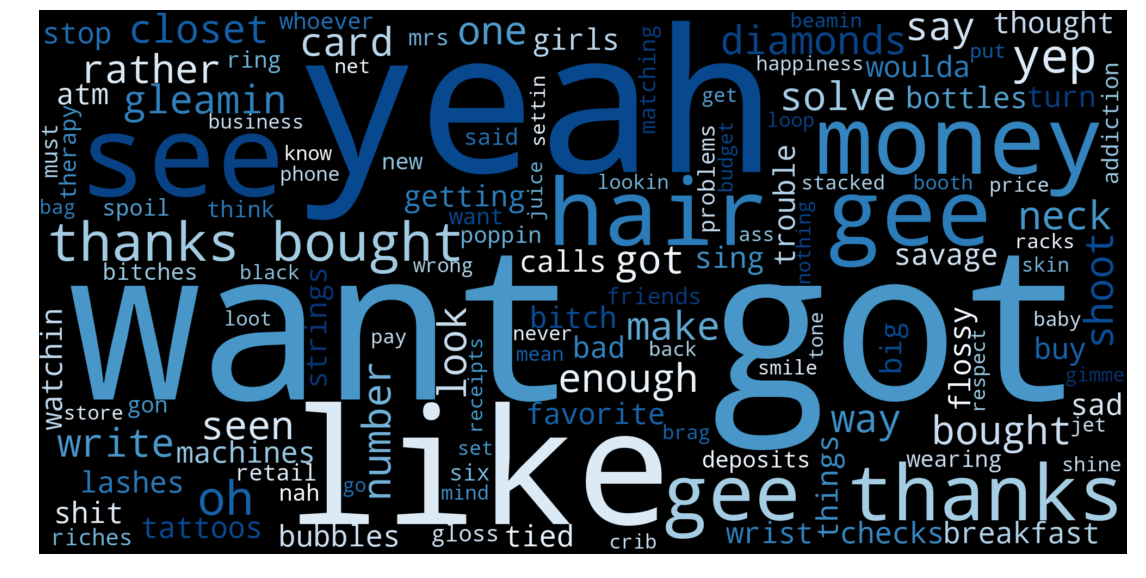

In [76]:
wordcloud = WordCloud(width = 2000, height = 1000, stopwords = stop_words, background_color="black", colormap = "Blues").generate(" ".join(df['token_lyrics'][0]))

plt.figure(figsize=[20, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [111]:
cloud_mask = np.array(Image.open("img/cloud.png"))
ariana_mask = np.array(Image.open("img/ariana.jpg"))
heart_mask = np.array(Image.open("img/heart.jpg"))

In [112]:
text = []
for song in df['token_lyrics']:
    for lyric in song:
        text.append(lyric)

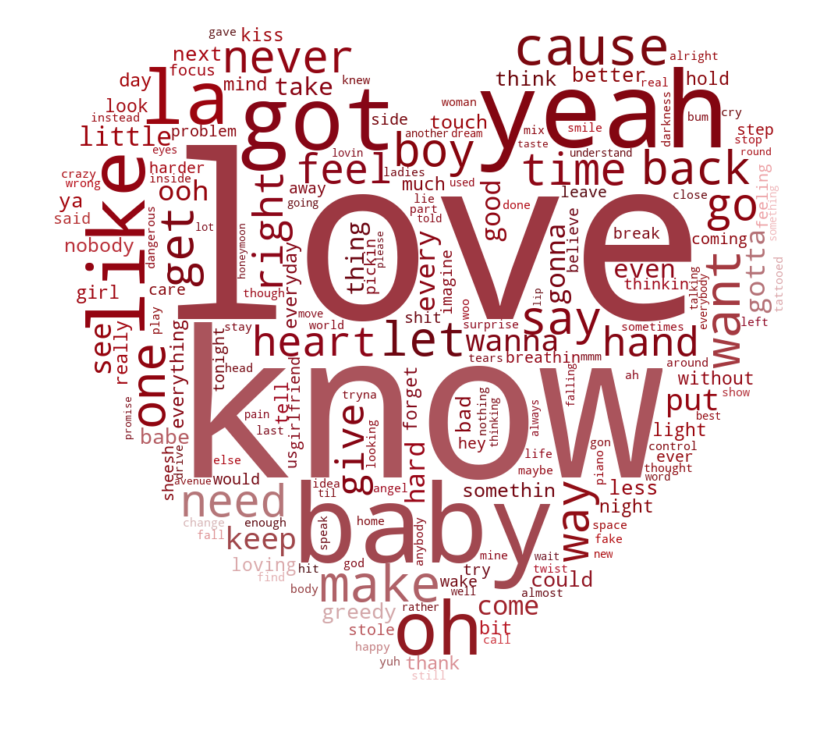

In [116]:
wordcloud = WordCloud(collocations=False, mask = heart_mask, width = 2000, height = 1000, stopwords = stop_words, background_color="white", colormap = "Blues").generate(" ".join(text))

image_colors = ImageColorGenerator(heart_mask)

plt.figure(figsize=[20, 10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [117]:
wordcloud.to_file("img/total3.png")

In [177]:
df

,album,image,lyrics,title,year,token_lyrics
0,"thank u, next",https://images.genius.com/51d06888c4262227293e...,"[Verse 1]\r\nYeah, breakfast at Tiffany's and ...",7 rings,2019-01-18,"[yeah, breakfast, at, tiffany's, and, bottles,..."
2,Yours Truly,https://images.rapgenius.com/7f68beb736101c0b0...,[Verse 1: Ariana Grande]\r\nI'd like to say we...,Almost Is Never Enough,2013-08-19,"[i'd, like, to, say, we, gave, it, a, try, i'd..."
3,Yours Truly,https://images.genius.com/fddd96754f2a82832a6d...,"[Verse 1]\r\nBaby, I got love for thee so deep...",Baby I,2013-07-22,"[baby, i, got, love, for, thee, so, deep, insi..."
4,Dangerous Woman,https://images.genius.com/a0457334423b0d9e793d...,"[Verse 1]\r\nBoy, you know that you drive me c...",Bad Decisions,2016-05-20,"[boy, you, know, that, you, drive, me, crazy, ..."
5,Dangerous Woman,https://images.genius.com/a0457334423b0d9e793d...,[Verse 1]\r\nMidnight shadows\r\nWhen finding ...,Be Alright,2016-03-18,"[midnight, shadows, when, finding, love, is, a..."
7,My Everything,https://images.genius.com/3187877fdee0425edaa1...,[Chorus]\r\nIf you know how to be my lover\r\n...,Be My Baby,2014-08-22,"[if, you, know, how, to, be, my, lover, maybe,..."
8,My Everything,https://images.genius.com/3187877fdee0425edaa1...,[Verse 1: Ariana Grande]\r\nHow soon do we for...,Best Mistake,2014-08-12,"[how, soon, do, we, forget, how, we, felt, dea..."
9,Yours Truly,https://images.rapgenius.com/7f68beb736101c0b0...,"[Verse 1]\r\nI told you once, ""Get out my life...",Better Left Unsaid,2013-08-30,"[i, told, you, once, get, out, my, life, i, do..."
13,My Everything,https://images.genius.com/7469b198c271e3a00f59...,[Click here to read how Zedd and Ariana Grande...,Break Free,2014-07-03,"[if, you, want, it, take, it, i, should've, sa..."
14,My Everything,https://images.genius.com/3187877fdee0425edaa1...,"[Produced by Andrew ""Pop"" Wansel and Warren ""O...",Break Your Heart Right Back,2014-08-22,"[i, shoulda, saw, it, coming, i, shoulda, saw,..."
